In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.patches as patches
import re
import random 
import pickle
import cv2
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_csv=pd.read_csv('/content/drive/MyDrive/train.csv')
train_csv.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
train_csv.shape

(7095, 3)

In [ ]:
Image_id=[]
label=[]
train_folder_path='/content/drive/MyDrive/train_images'
for i in os.listdir(train_folder_path): 
    for j in range(1,5):
        Image_id.append(i)
        label.append(j)

x={'ImageId':Image_id,'ClassId':label} 
train_img=pd.DataFrame(x)
train_img.head(10)

,ImageId,ClassId
0,e9e04715b.jpg,1
1,e9e04715b.jpg,2
2,e9e04715b.jpg,3
3,e9e04715b.jpg,4
4,ea69073bd.jpg,1
5,ea69073bd.jpg,2
6,ea69073bd.jpg,3
7,ea69073bd.jpg,4
8,ea8acd661.jpg,1
9,ea8acd661.jpg,2


In [ ]:

image_size=set()
train_folder_path ='/content/drive/MyDrive/train_images'
for i in os.listdir(train_folder_path):
  image_size.add(cv2.imread(train_folder_path+'/'+i).shape)
unique_image=list(image_size)
for x in unique_image:
  print (x)

(256, 1600, 3)


Each image is 256x1600 resolution

In [ ]:
df=pd.merge(train_img,train_csv,how='outer',on=['ImageId','ClassId'])
df.fillna('',inplace=True)
df.head()

,ImageId,ClassId,EncodedPixels
0,e9e04715b.jpg,1,
1,e9e04715b.jpg,2,
2,e9e04715b.jpg,3,
3,e9e04715b.jpg,4,352243 3 352494 10 352747 15 353003 17 353258 ...
4,ea69073bd.jpg,1,


In [ ]:
train=pd.pivot_table(df,values='EncodedPixels',index='ImageId',columns='ClassId',aggfunc=np.sum).astype(str)
train=train.reset_index()
train.columns=['image_id','rle_1','rle_2','rle_3','rle_4'] 
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


Stratified corrosion is a type of corrosion that progresses parallel to the metal surface in such a manner that underlying layers are gradually separated.
For stratified sampling, we have taken stratified based on minority label priority

In [ ]:
defect=[]
stratify=[]
for i in range(len(train)):
  if (train['rle_1'][i] != '' or train['rle_2'][i] != '' or train['rle_3'][i] != '' or train['rle_4'][i] != ''):
    defect.append(1)
  else:
    defect.append(0)
  
  if train['rle_1'][i] != '':
    stratify.append(1)
  elif train['rle_2'][i] != '':
    stratify.append(2)
  elif train['rle_3'][i] != '':
    stratify.append(3)
  elif train['rle_4'][i] != '':
    stratify.append(4)
  else:
    stratify.append(0)
train['defect']=defect
train['stratify']=stratify

In [ ]:
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1
1,00031f466.jpg,,,,,0,0
2,000418bfc.jpg,,,,,0,0
3,000789191.jpg,,,,,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3


In [ ]:
defect_1,defect_2,defect_3,defect_4=[],[],[],[]
for i in range(len(train)):
  if train['rle_1'][i] != '':
    defect_1.append(1)
  else:
    defect_1.append(0)
  if train['rle_2'][i] != '':
    defect_2.append(1)
  else:
    defect_2.append(0)
  if train['rle_3'][i] != '':
    defect_3.append(1)
  else:
    defect_3.append(0)
  if train['rle_4'][i] != '':
    defect_4.append(1)
  else:
    defect_4.append(0)
train['defect_1']=defect_1
train['defect_2']=defect_2
train['defect_3']=defect_3
train['defect_4']=defect_4
train['total_defects']=train['defect_1']+ train['defect_2']+ train['defect_3']+ train['defect_4']
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3,0,0,1,0,1


In [ ]:
train.shape

(12568, 12)

In [ ]:
test_image=[i for i in os.listdir('/content/drive/MyDrive/test_images')]

In [ ]:
len(test_image)

5506

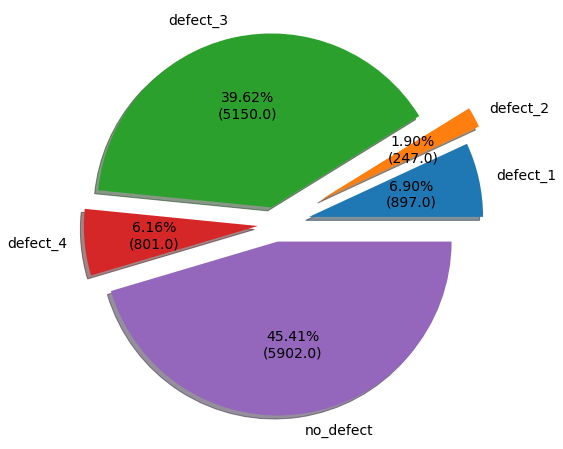

In [ ]:
defect_1,defect_2,defect_3,defect_4,no_defect=0,0,0,0,0
def func(v,p):
  a=p*sum(v)/100
  return "{:.2f}%\n({:.1f})".format(p,a)
for i in range(len(train)):
  if train['rle_1'][i] != '':
    defect_1+=1
  if train['rle_2'][i] != '':
    defect_2+=1
  if train['rle_3'][i] != '':
    defect_3+=1
  if train['rle_4'][i] != '':
    defect_4+=1
  if train['defect'][i] == 0:
    no_defect+=1
labels=['defect_1','defect_2','defect_3','defect_4','no_defect']
sizes=[defect_1,defect_2,defect_3,defect_4,no_defect]
explode=(0.2,0.3,0.1,0.1,0.1)
fig,ax=plt.subplots(figsize=(16,8))
ax.pie(sizes,explode=explode,labels=labels,textprops={'fontsize': 14},autopct=lambda p: func(sizes,p),shadow=True)
#fig.suptitle('Defect Distribution',fontsize=25,fontweight='bold')
fig.set_facecolor("white")
plt.show()

In [ ]:
'''dataset imbalanced.
Data augmentation and resampling techniques will be required to perform the defect detection.
'''

'dataset imbalanced.\nData augmentation and resampling techniques will be required to perform the defect detection.\n'

In [ ]:
def patch1(bar,ax):
  for p in bar.patches: 
     width=p.get_width()
     height=p.get_height()
     x,y=p.get_xy() 
     ax.annotate('{}'.format(height),(x+width/2,y+height*1.02),ha='center',fontsize=14)

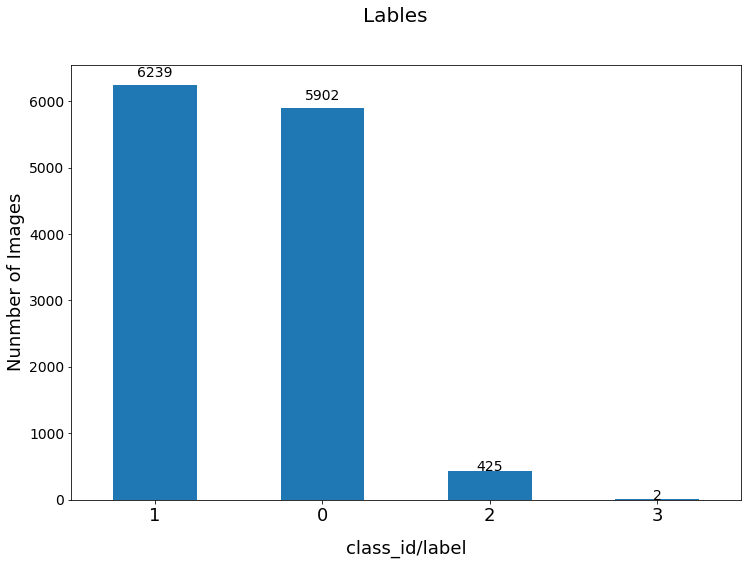

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
a=train['total_defects'].value_counts().plot(kind='bar')
patch1(a,ax) 
ax.set_xlabel("class_id/label",fontsize=18,labelpad=15)
ax.set_ylabel("Nunmber of Images",fontsize=18)
plt.xticks(rotation='horizontal',fontsize=18)
plt.yticks(fontsize=14)
fig.suptitle('Lables',fontsize=20)
ax.set_facecolor("white")
fig.set_facecolor("white")
plt.show()

5902 images with no_defect label.
6239 images with 1 label.
425 images with 2 labels.
2 images with 3 labels.
half of images are defect free.
Most of images with defects contain the defects of only one type.
In rare cases an image contains the defects of two different types.

In [ ]:
def rle_to_mask(rle):

    if (pd.isnull(rle))|(rle=='')|(rle=='-1'): 
        return np.zeros((256,1600) ,dtype=np.uint8)
    
    height= 256
    width = 1600
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])]=1
    
    return mask.reshape((height,width),order='F')

In [ ]:
def plot_mask(rle_defect,k):
  x=rle_defect.columns[2]
  train_folder_path='/content/drive/MyDrive/train_images/'
  fig,ax=plt.subplots(4,2,figsize=(14,9))
  fig.suptitle('Defect_'+str(k)+'_Images',fontsize=20)
  for i in range(4):
    image_id=rle_defect['image_id'][i]
    rle=rle_defect[x][i]
    im=Image.open(train_folder_path+str(image_id))
    ax[i,0].imshow(im)
    ax[i,0].set_title(image_id)
    mask=rle_to_mask(rle)
    ax[i,1].imshow(mask)
    ax[i,1].set_title("Mask for "+str(image_id))
  fig.set_facecolor("white")
  plt.show()

In [ ]:
'''
rle_defect=train[train['defect_0']==1]
rle_defect=rle_defect[['image_id','rle_0']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,0)
'''

"\nrle_defect=train[train['defect_0']==1]\nrle_defect=rle_defect[['image_id','rle_0']]\nrle_defect=rle_defect.sample(n=4) \nrle_defect=rle_defect.reset_index()\nplot_mask(rle_defect,0)\n"

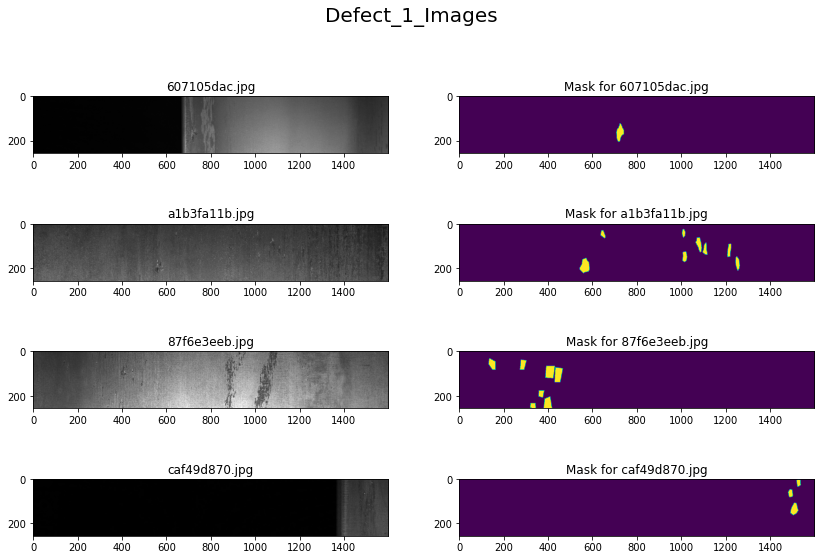

In [ ]:
rle_defect=train[train['defect_1']==1]
rle_defect=rle_defect[['image_id','rle_1']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,1)

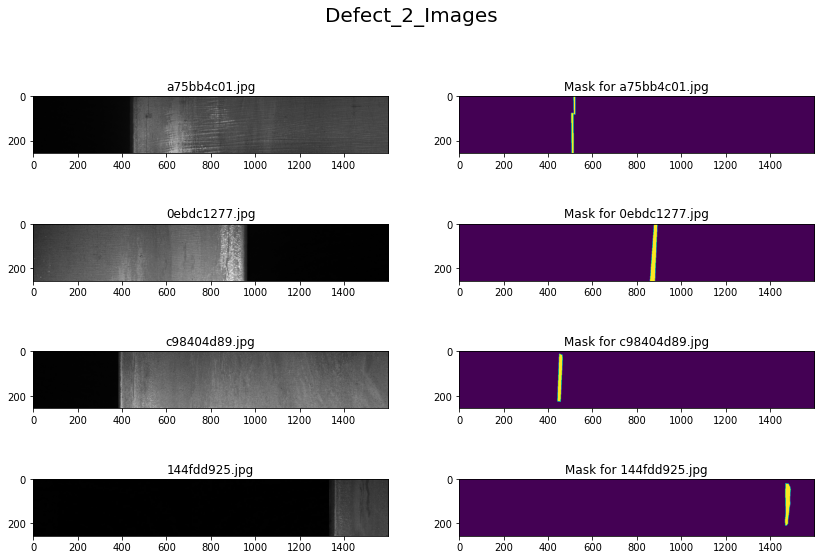

In [ ]:
rle_defect=train[train['defect_2']==1]
rle_defect=rle_defect[['image_id','rle_2']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,2)

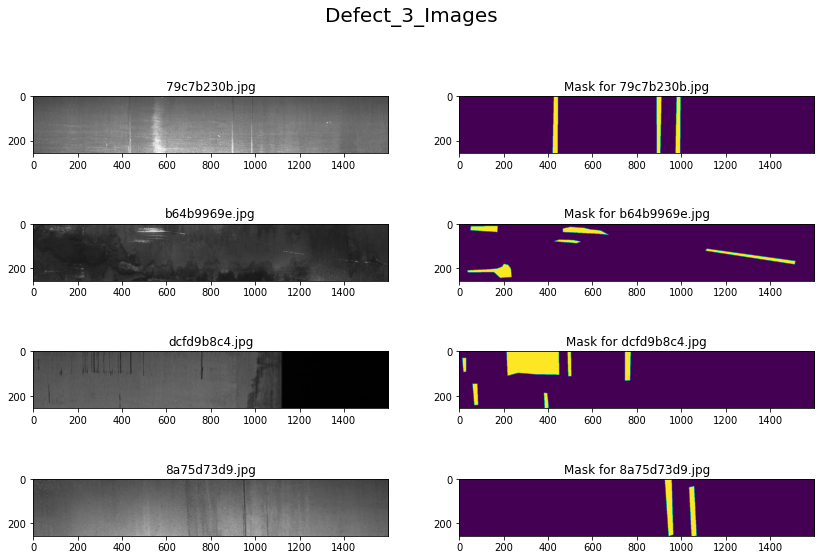

In [ ]:
rle_defect=train[train['defect_3']==1]
rle_defect=rle_defect[['image_id','rle_3']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,3)

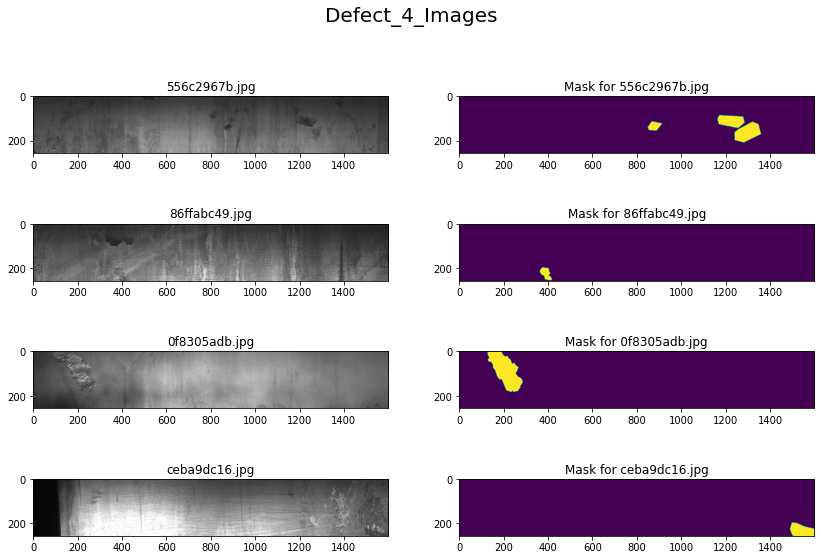

In [ ]:
rle_defect=train[train['defect_4']==1]
rle_defect=rle_defect[['image_id','rle_4']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,4)

In [ ]:
def mask_areas(rle_defect):
  area=[]
  for i in rle_defect:
    mask=np.sum(rle_to_mask(i))
    area.append(np.sum(rle_to_mask(i)))
  return area

For images with large mask areas

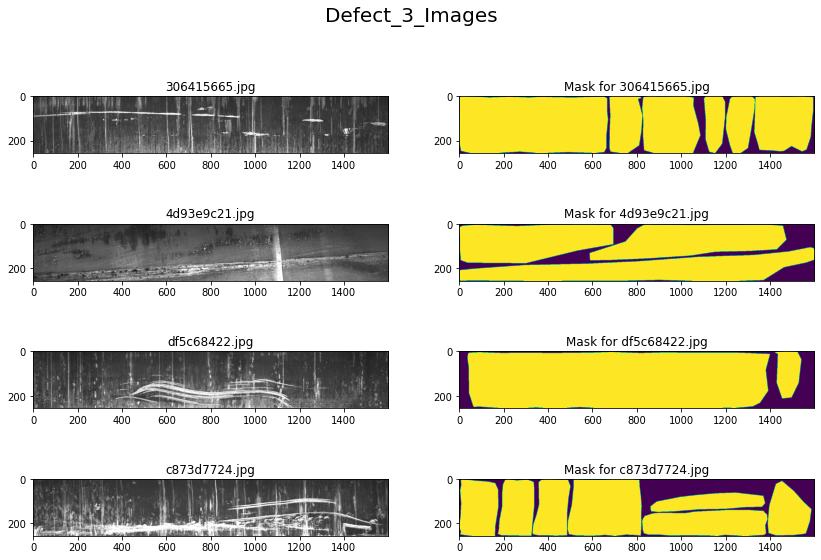

'\nplt.title = None\nplt.subtitle = None\n'

In [ ]:
rle_defect=train[train['defect_3']==1]
rle=rle_defect['rle_3']
rle_3_area=mask_areas(rle)
rle_defect['rle_3_area']=rle_3_area
rle_defect=rle_defect[rle_defect['rle_3_area']>300000]
rle_defect=rle_defect[['image_id','rle_3']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,3)
'''
plt.title = None
plt.subtitle = None
'''

In [ ]:
'''
rle_defect=train[train['defect_2']==1]
rle=rle_defect['rle_2']
rle_3_area=mask_areas(rle)
rle_defect['rle_2_area']=rle_2_area
rle_defect=rle_defect[rle_defect['rle_2_area']>200000]
rle_defect=rle_defect[['image_id','rle_2']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,2)
'''

"\nrle_defect=train[train['defect_2']==1]\nrle=rle_defect['rle_2']\nrle_3_area=mask_areas(rle)\nrle_defect['rle_2_area']=rle_2_area\nrle_defect=rle_defect[rle_defect['rle_2_area']>200000]\nrle_defect=rle_defect[['image_id','rle_2']]\nrle_defect=rle_defect.sample(n=4) \nrle_defect=rle_defect.reset_index()\nplot_mask(rle_defect,2)\n"

In [ ]:
import numpy as np 
import pandas as pd
import random as rn
import cv2 as cv 
import os
import sys
from pathlib import Path


import tensorflow as tf
from tensorflow.random import set_seed 
from tensorflow import random

from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

img_train_folder = '/content/drive/MyDrive/train_images'
img_test_folder = '/content/drive/MyDrive/test_images'

In [ ]:
X = np.eye(3,3, dtype=np.uint8)
Y = np.eye(3,3, dtype=np.uint8)

X[1,1] = 0

In [ ]:
print(X)
print('')
print(Y)

[[1 0 0]
 [0 0 0]
 [0 0 1]]

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
def dice_coefficient(X, y):

    predicted = X.flatten()
    truth = y.flatten()

    overlap = np.sum(predicted * truth)
    total_surface_area = np.sum(predicted + truth)
    

    return 2 * overlap / total_surface_area

In [ ]:
def mask_to_rle(mask):
    flat = mask.flatten()
    
    padded = np.concatenate([[0], flat, [0]])

    runs = np.where(padded[1:] != padded[:-1])[0] 

    runs += 1

    runs[1::2] -= runs[0::2]
 
    return ' '.join(str(x) for x in runs)

In [ ]:
rle_example = mask_to_rle(X)
print(f'The run-length encoding for our example would be: "{rle_example}"')

The run-length encoding for our example would be: "1 1 9 1"


In [ ]:
def rle_to_mask(lre, shape=(1600,256)):

    runs = np.asarray([int(run) for run in lre.split(' ')])
    
    runs[1::2] += runs[0::2]

    runs -= 1

    run_starts, run_ends = runs[0::2], runs[1::2]

    h, w = shape
    mask = np.zeros(h*w, dtype=np.uint8)
    for start, end in zip(run_starts, run_ends):
        mask[start:end] = 1

    return mask.reshape(shape)

In [ ]:
print(f'Mask reconstructed from run-length encoding ("{rle_example}") \
example:\n{rle_to_mask(rle_example, shape=(3,3))}')

The mask reconstructed from the run-length encoding ("1 1 9 1") for our example would be:
[[1 0 0]
 [0 0 0]
 [0 0 1]]


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/train.csv')
data['ClassId'] = data['ClassId'].astype(np.uint8)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        7095 non-null   object
 1   ClassId        7095 non-null   uint8 
 2   EncodedPixels  7095 non-null   object
dtypes: object(2), uint8(1)
memory usage: 117.9+ KB


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
'''
squashed = data.dropna(subset=['EncodedPixels'], axis='rows', inplace=True)

squashed = (
    data[['ImageId', 'EncodedPixels', 'ClassId']]
        .groupby('ImageId', as_index=False) 
        .agg(list) 
)

squashed['DistinctDefectTypes'] = squashed['ClassId'].apply(lambda x: len(x))

squashed.head(10)
'''

"\nsquashed = data.dropna(subset=['EncodedPixels'], axis='rows', inplace=True)\n\nsquashed = (\n    data[['ImageId', 'EncodedPixels', 'ClassId']]\n        .groupby('ImageId', as_index=False) \n        .agg(list) \n)\n\nsquashed['DistinctDefectTypes'] = squashed['ClassId'].apply(lambda x: len(x))\n\nsquashed.head(10)\n"

In [ ]:

squashed = data.dropna(subset=['EncodedPixels'], axis='rows', inplace=True)

squashed = (
    data[['ImageId', 'EncodedPixels', 'ClassId']]
        .groupby('ImageId', as_index=False) 
        .agg(list) 
)

squashed['DistinctDefectTypes'] = squashed['ClassId'].apply(lambda x: len(x))

squashed.head(10)

,ImageId,EncodedPixels,ClassId,DistinctDefectTypes
0,0002cc93b.jpg,[29102 12 29346 24 29602 24 29858 24 30114 24 ...,[1],1
1,0007a71bf.jpg,[18661 28 18863 82 19091 110 19347 110 19603 1...,[3],1
2,000a4bcdd.jpg,[37607 3 37858 8 38108 14 38359 20 38610 25 38...,[1],1
3,000f6bf48.jpg,[131973 1 132228 4 132483 6 132738 8 132993 11...,[4],1
4,0014fce06.jpg,[229501 11 229741 33 229981 55 230221 77 23046...,[3],1
5,0025bde0c.jpg,[8458 14 8707 35 8963 48 9219 71 9475 88 9731 ...,"[3, 4]",2
6,002af848d.jpg,[290800 6 291055 13 291311 15 291566 18 291822...,[4],1
7,002fc4e19.jpg,[146021 3 146275 10 146529 40 146783 46 147038...,"[1, 2]",2
8,0030401a5.jpg,[186833 1 187089 3 187344 6 187600 7 187855 10...,[4],1
9,0046839bd.jpg,[152926 1 153180 4 153434 6 153689 8 153943 11...,[3],1


In [ ]:
'''
import colorlover as cl

colors = cl.scales['4']['qual']['Set3']
labels = np.array(range(1,5))

palette = dict(zip(labels, np.array(cl.to_numeric(colors))))
'''

"\nimport colorlover as cl\n\ncolors = cl.scales['4']['qual']['Set3']\nlabels = np.array(range(1,5))\n\npalette = dict(zip(labels, np.array(cl.to_numeric(colors))))\n"

In [ ]:

import colorlover as cl

colors = cl.scales['4']['qual']['Set3']
labels = np.array(range(1,5))

palette = dict(zip(labels, np.array(cl.to_numeric(colors))))

In [ ]:
classes = (
    data.groupby(by='ClassId', as_index=False)
        .agg({'ImageId':'count'})
        .rename(columns={'ImageId':'Count'})
)

classes['Frequency'] = round(classes['Count'] / classes['Count'].sum() * 100, 2) 
classes['Frequency'] = classes['Frequency'].astype(str) + '%'

fig = go.Figure(
    
    data=go.Bar(
        orientation='h',
        x=classes.Count,
        y=classes.ClassId,
        hovertext=classes.Frequency,
        text=classes.Count,
        textposition='auto',
        marker_color=colors),
    
    layout=go.Layout(
        title='Defect Type: Count & Frequency',
        showlegend=False,
        xaxis=go.layout.XAxis(showticklabels=False),
        yaxis=go.layout.YAxis(autorange='reversed'),
        width=750, height=400
    )
)
fig.show()

In [ ]:
permutations = pd.DataFrame(data=squashed.ClassId.astype(str).value_counts())

permutations['Frequency'] = round(permutations['ClassId'] / permutations['ClassId'].sum() * 100, 2)
permutations['Frequency'] = permutations['Frequency'].astype(str) + '%'

fig = go.Figure(
    
    data=go.Bar(
        orientation='h',
        x=permutations.ClassId,
        y=permutations.index,
        hovertext=permutations.Frequency,
        text=permutations.ClassId,
        textposition='auto'),
    
    layout=go.Layout(
        title='Count of Distinct Defect Combinations in Images',
        showlegend=False,
        xaxis=go.layout.XAxis(showticklabels=False),
        yaxis=go.layout.YAxis(autorange='reversed'),
        width=750, height=500
    )
)

fig.show()

In [ ]:
def build_mask(encodings, labels):
    mask = np.zeros((256,1600,4), dtype=np.uint8)
   
    for rle, label in zip(encodings, labels):

        index = label - 1

        mask[:,:,index] = rle_to_mask(rle).T
    
    return mask
def mask_to_contours(image, mask_layer, color):
    contours, hierarchy = cv.findContours(mask_layer, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    image = cv.drawContours(image, contours, -1, color, 2)
        
    return image

In [ ]:
def visualise_mask(file_name, mask):

    image = cv.imread(f'{img_train_folder}/{file_name}')

    for index in range(mask.shape[-1]):
        label = index + 1
        image = mask_to_contours(image, mask[:,:,index], color=palette[label])   
        
    return image

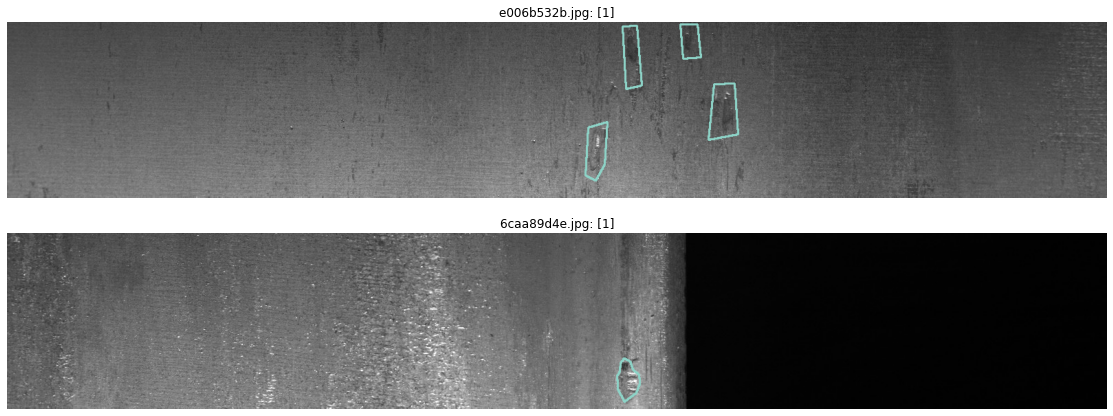

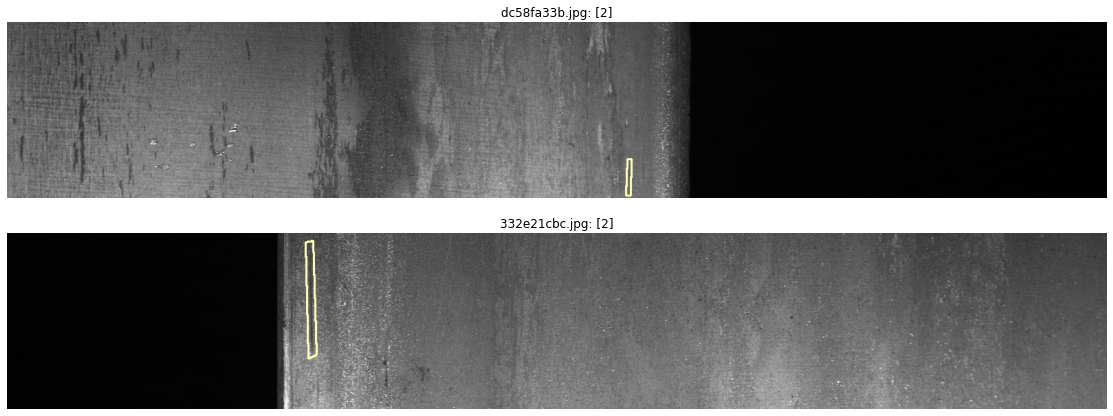

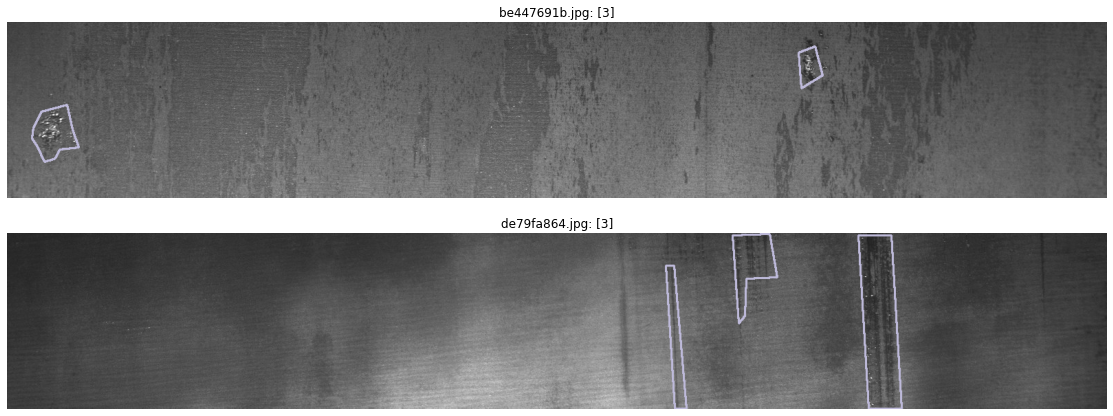

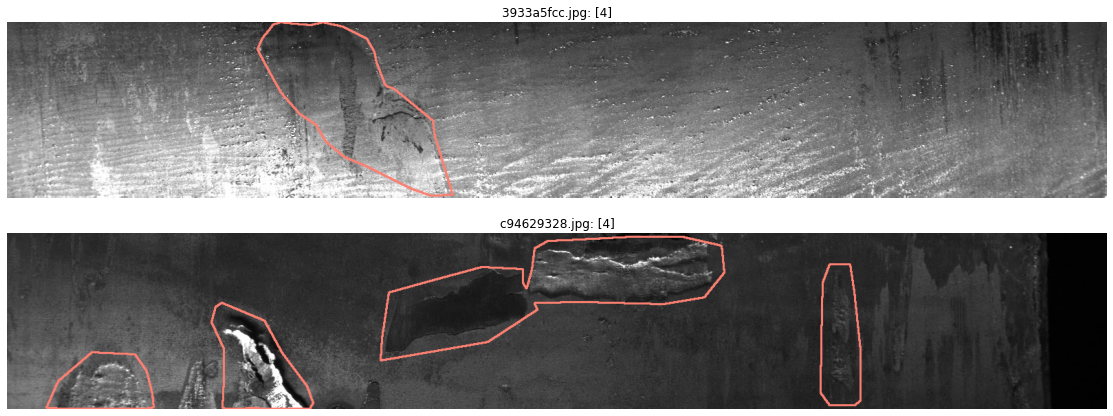

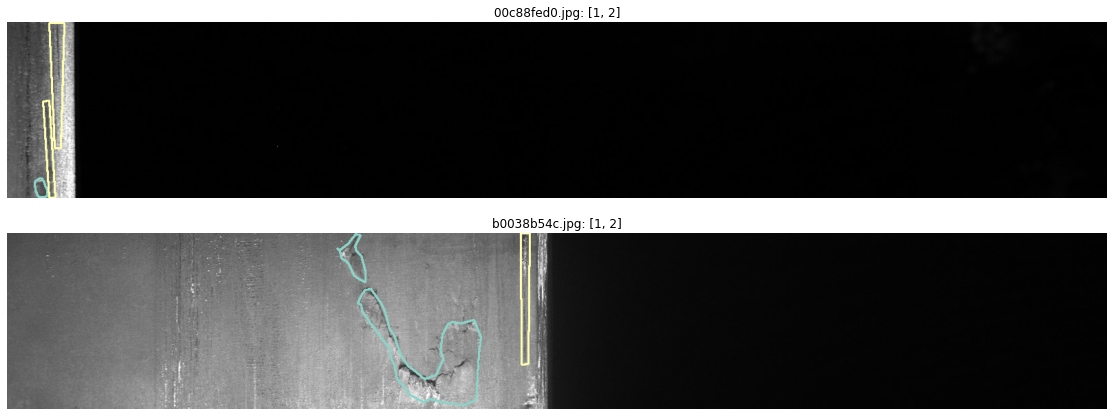

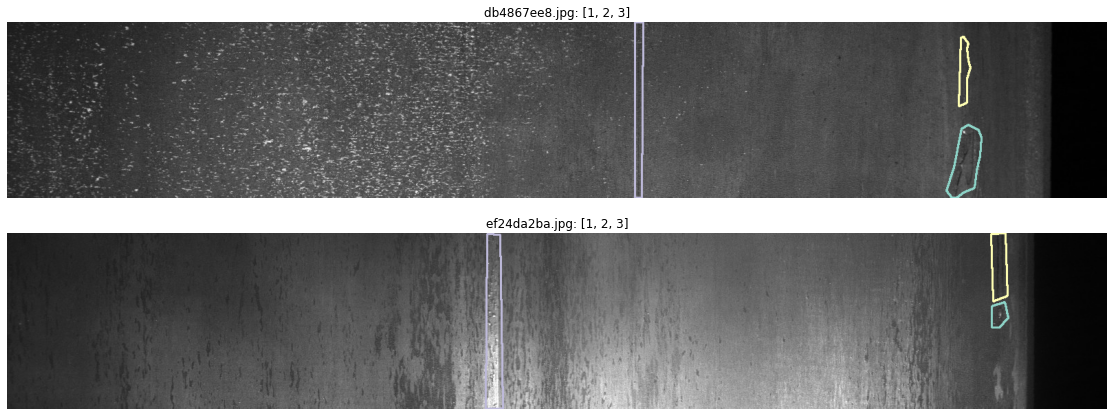

In [ ]:
conditions = [
    squashed['ClassId'].astype(str)=='[1]',
    squashed['ClassId'].astype(str)=='[2]',
    squashed['ClassId'].astype(str)=='[3]',
    squashed['ClassId'].astype(str)=='[4]',
    squashed['DistinctDefectTypes']==2,
    squashed['DistinctDefectTypes']==3
]


sample_size = 2

for condition in conditions:
    sample = squashed[condition].sample(sample_size) 
    
    fig, axes = plt.subplots(sample_size, 1, figsize=(16, sample_size*3))
    fig.tight_layout()

    for i, (index, row) in enumerate(sample.iterrows()):

        ax = axes[i,]

        mask = build_mask(encodings=row.EncodedPixels, labels=row.ClassId)

        image = visualise_mask(file_name=row.ImageId, mask=mask)
        
        ax.set_title(f'{row.ImageId}: {row.ClassId}')
        ax.axis('off')
        ax.imshow(image);

"\ntrain_df = train_df.reset_index()\ntrain_df2 = pd.DataFrame({'ImageId':n/train_images/*')})\ntrain_df2['ImageId'] = train_df2['ImageId'].apply(lambda x: x.split('/')[-1])\ntrain_df = pd.merge(train_df, train_df2, how='outer', on='ImageId')\n"

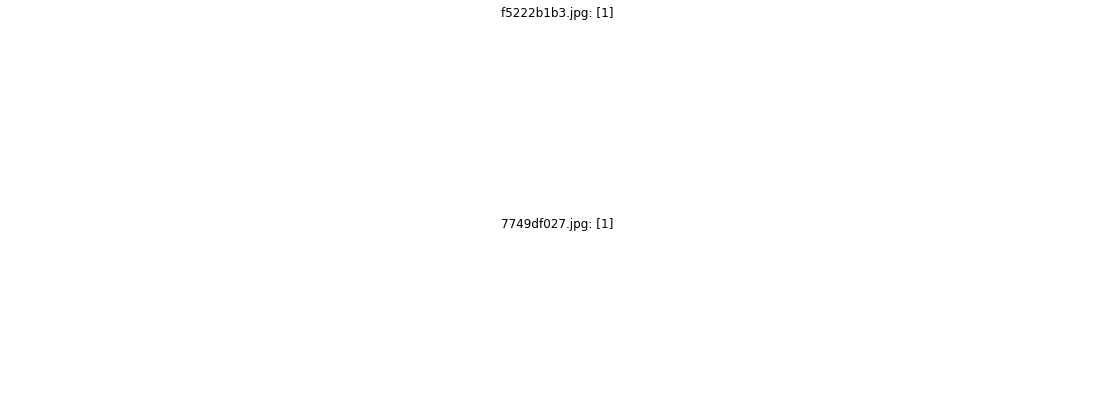

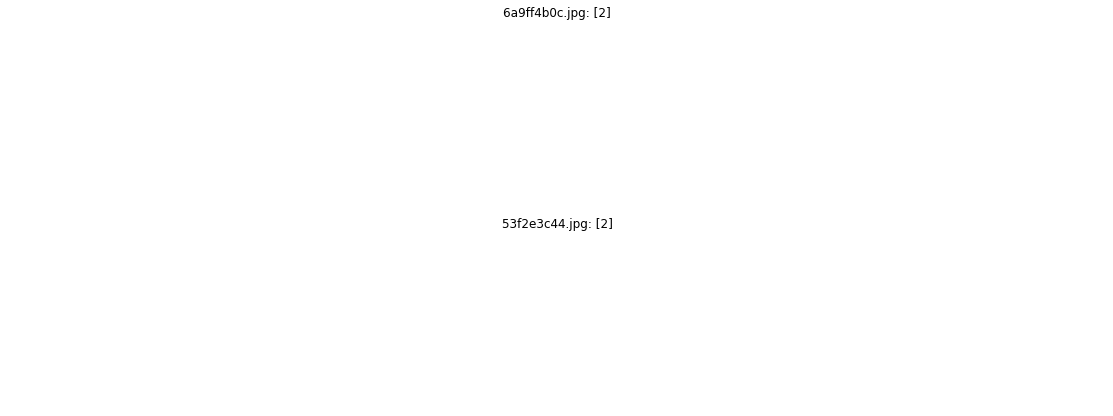

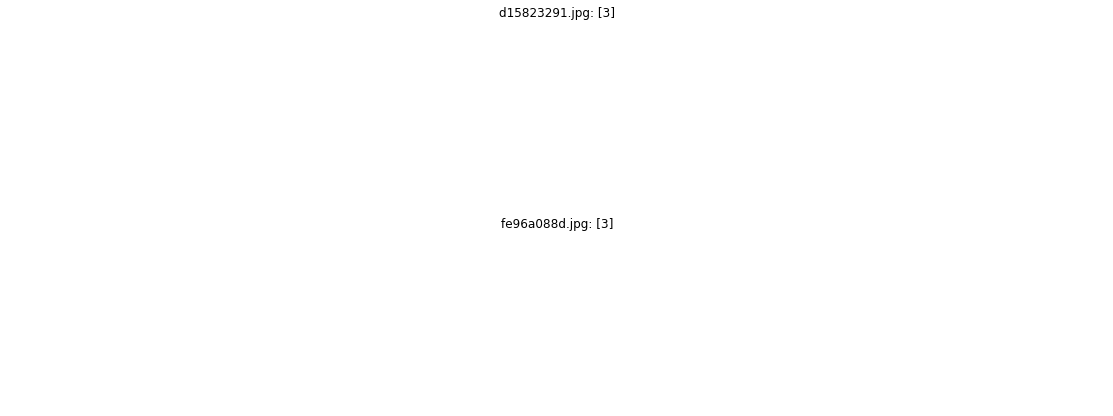

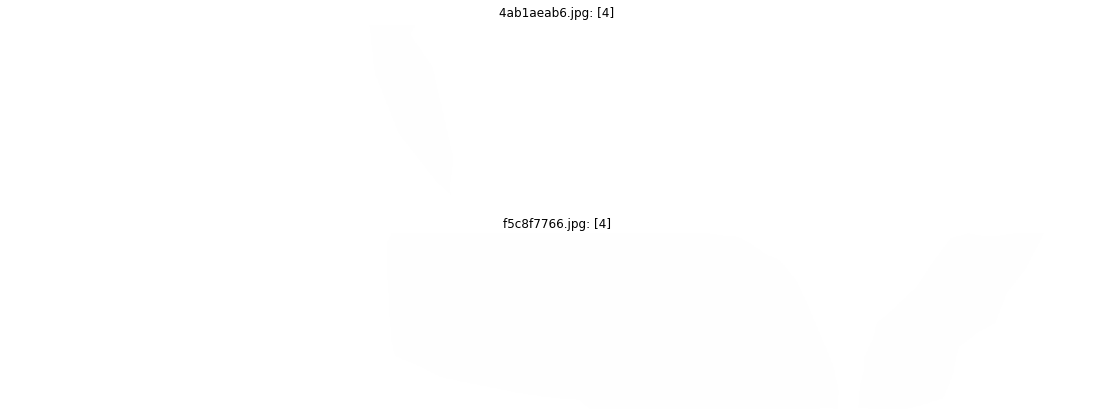

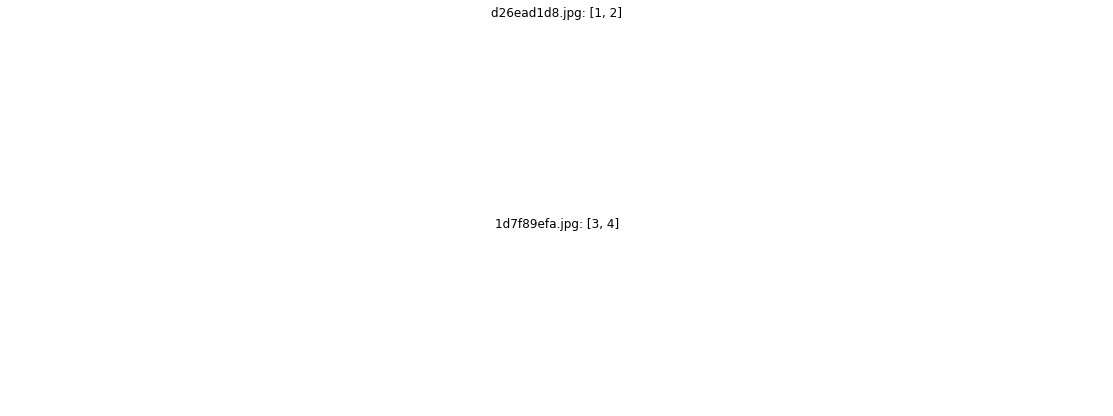

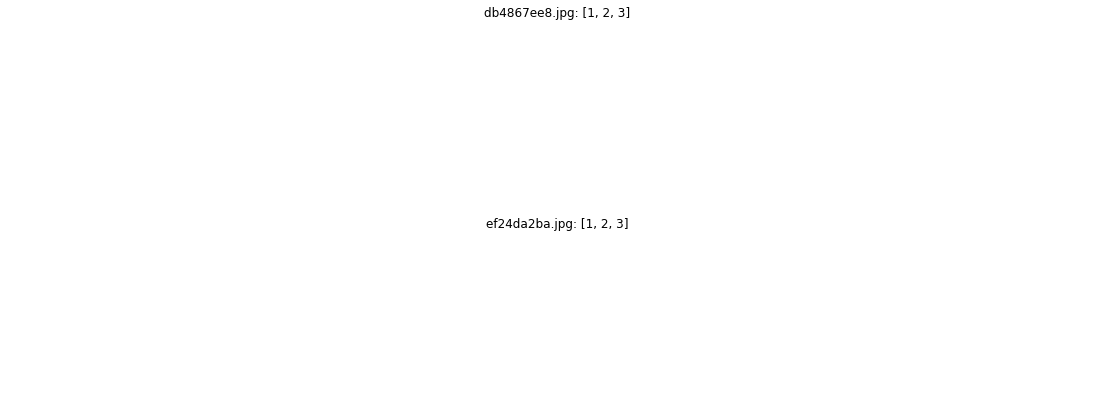

In [ ]:

conditions = [
    squashed['ClassId'].astype(str)=='[1]',
    squashed['ClassId'].astype(str)=='[2]',
    squashed['ClassId'].astype(str)=='[3]',
    squashed['ClassId'].astype(str)=='[4]',
    squashed['DistinctDefectTypes']==2,
    squashed['DistinctDefectTypes']==3
]


sample_size = 2

for condition in conditions:

    sample = squashed[condition].sample(sample_size) 
    
    fig, axes = plt.subplots(sample_size, 1, figsize=(16, sample_size*3))
    fig.tight_layout()
    
    for i, (index, row) in enumerate(sample.iterrows()):
        
        ax = axes[i,]
       
        mask = build_mask(encodings=row.EncodedPixels, labels=row.ClassId)

        image = visualise_mask(file_name=row.ImageId, mask=mask)
        
        ax.set_title(f'{row.ImageId}: {row.ClassId}')
        ax.axis('off')
        ax.imshow(mask);

'''
train_df = train_df.reset_index()
train_df2 = pd.DataFrame({'ImageId':n/train_images/*')})
train_df2['ImageId'] = train_df2['ImageId'].apply(lambda x: x.split('/')[-1])
train_df = pd.merge(train_df, train_df2, how='outer', on='ImageId')
'''

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 101)
import os

import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns
from collections import Counter
from PIL import Image
import math
import seaborn as sns
from collections import defaultdict
from pathlib import Path
import cv2
from tqdm import tqdm
import glob

In [ ]:
input_dir = '/content/drive/MyDrive/casting_data'

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
sample_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [ ]:
train_df = train_df.pivot(index='ImageId',columns='ClassId',values='EncodedPixels')
train_df.head()

ClassId,1,2,3,4
ImageId,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN


In [ ]:
train_df = train_df.reset_index()
train_df2 = pd.DataFrame({'ImageId': glob.glob('../input/severstal-steel-defect-detection/train_images/*')})
train_df2['ImageId'] = train_df2['ImageId'].apply(lambda x: x.split('/')[-1])
train_df = pd.merge(train_df, train_df2, how='outer', on='ImageId')